<a href="https://colab.research.google.com/github/joyb05/Market-Basket-Analysis-Restaurant-Dataset/blob/main/Market_Basket_Analysis_Restaurant_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Market Basket Analysis - Restaurant Dataset

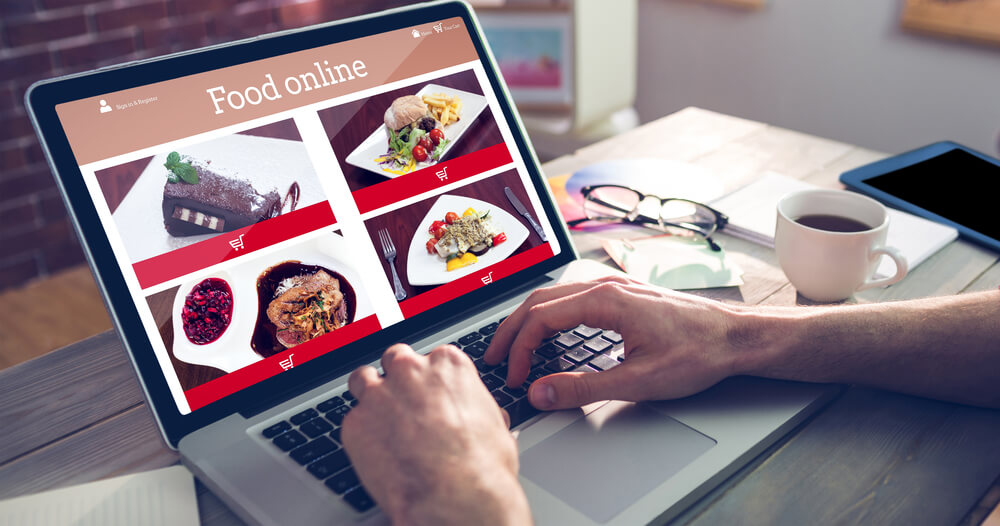

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd. set_option("display.max_colwidth", None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Restaurant.csv")

In [4]:
df.head()

,Order_Number,Item_Name,Quantity,Product_Price,Total_products,total_cost,Date,Time
0,6769,Korma,25,8.95,8,1790.0,2017-09-18,16:54:00
1,6769,Chicken Tikka Masala,25,8.95,8,1790.0,2017-09-18,16:54:00
2,9374,House white wine 75cl,2,17.95,46,1651.4,2018-04-29,14:16:00
3,9374,House Red wine 75cl,2,17.95,46,1651.4,2018-04-29,14:16:00
4,6769,Chicken Biryani,20,9.95,8,1592.0,2017-09-18,16:54:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61727 entries, 0 to 61726
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Number    61727 non-null  int64  
 1   Item_Name       61727 non-null  object 
 2   Quantity        61727 non-null  int64  
 3   Product_Price   61727 non-null  float64
 4   Total_products  61727 non-null  int64  
 5   total_cost      61727 non-null  float64
 6   Date            61727 non-null  object 
 7   Time            61727 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 3.8+ MB


In [6]:
df.describe()

,Order_Number,Quantity,Product_Price,Total_products,total_cost
count,61727.000000,61727.000000,61727.000000,61727.000000,61727.000000
mean,9081.128744,1.254200,6.066865,7.100426,47.225334
std,4050.603971,0.853417,3.101551,4.105486,45.561535
min,651.000000,1.000000,0.500000,1.000000,14.400000
25%,5543.000000,1.000000,2.950000,5.000000,23.700000
50%,9042.000000,1.000000,5.950000,6.000000,35.800000
75%,12601.000000,1.000000,8.950000,8.000000,55.650000
max,16118.000000,51.000000,17.950000,60.000000,1790.000000


In [7]:
df.isnull().sum()

Order_Number      0
Item_Name         0
Quantity          0
Product_Price     0
Total_products    0
total_cost        0
Date              0
Time              0
dtype: int64

In [8]:
df['Date'] = pd.to_datetime(df.Date)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61727 entries, 0 to 61726
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order_Number    61727 non-null  int64         
 1   Item_Name       61727 non-null  object        
 2   Quantity        61727 non-null  int64         
 3   Product_Price   61727 non-null  float64       
 4   Total_products  61727 non-null  int64         
 5   total_cost      61727 non-null  float64       
 6   Date            61727 non-null  datetime64[ns]
 7   Time            61727 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 3.8+ MB


In [9]:
df['day'] = df['Date'].apply(lambda x:x.day)
df['month'] = df['Date'].apply(lambda x:x.month)
df['year'] = df['Date'].apply(lambda x:x.year)

In [10]:
df['date_name'] = df['Date'].dt.day_name()

In [11]:
df.loc[(df['month']>= 1) &(df['month'] <=2), 'season'] = "winter"
df.loc[(df['month']>= 3) &(df['month'] <=4), 'season'] = "spring"
df.loc[(df['month']>= 5) &(df['month'] <=6), 'season'] = "summer"
df.loc[(df['month']>= 7) &(df['month'] <=8), 'season'] = "monsoon"
df.loc[(df['month']>= 9) &(df['month'] <=10), 'season'] = "autumn"
df.loc[(df['month']>= 11) &(df['month'] <=12), 'season'] = "winter"

In [12]:
df.head().sort_values('season')

,Order_Number,Item_Name,Quantity,Product_Price,Total_products,total_cost,Date,Time,day,month,year,date_name,season
0,6769,Korma,25,8.95,8,1790.0,2017-09-18,16:54:00,18,9,2017,Monday,autumn
1,6769,Chicken Tikka Masala,25,8.95,8,1790.0,2017-09-18,16:54:00,18,9,2017,Monday,autumn
4,6769,Chicken Biryani,20,9.95,8,1592.0,2017-09-18,16:54:00,18,9,2017,Monday,autumn
2,9374,House white wine 75cl,2,17.95,46,1651.4,2018-04-29,14:16:00,29,4,2018,Sunday,spring
3,9374,House Red wine 75cl,2,17.95,46,1651.4,2018-04-29,14:16:00,29,4,2018,Sunday,spring


In [13]:
sns.set(rc = {'figure.figsize':(16,8)})

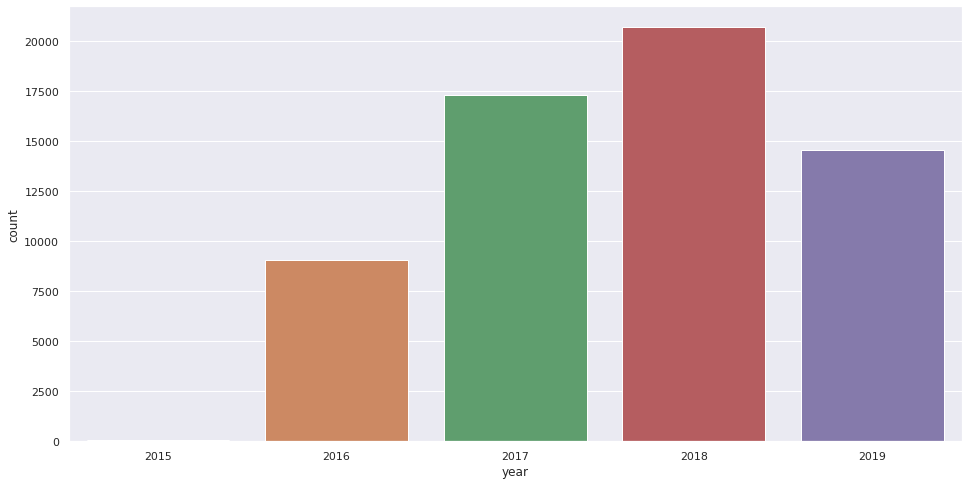

In [14]:
sns.countplot(x = 'year', data = df)

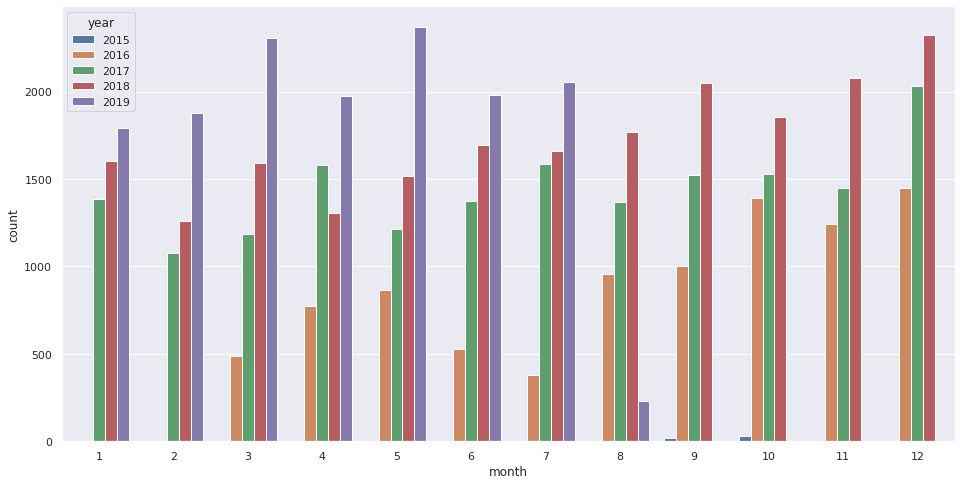

In [15]:
sns.countplot(x = 'month', hue = 'year', data = df)

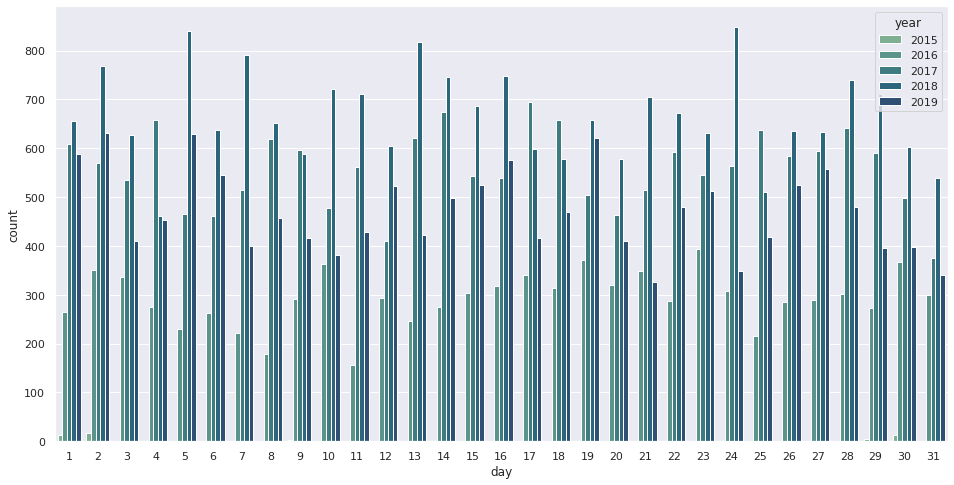

In [16]:
sns.countplot(x = 'day', data = df, hue = 'year', palette = 'crest')

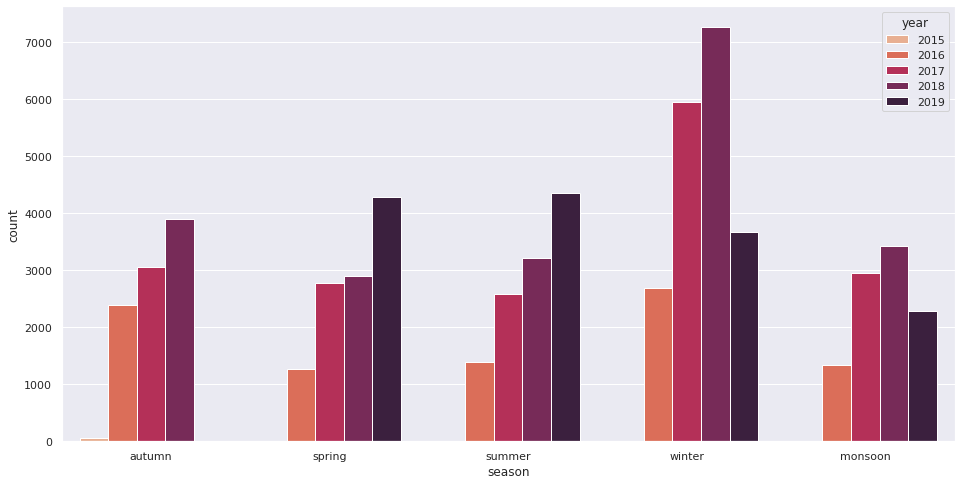

In [17]:
sns.countplot(x = 'season', data = df, hue = 'year', palette = 'rocket_r')

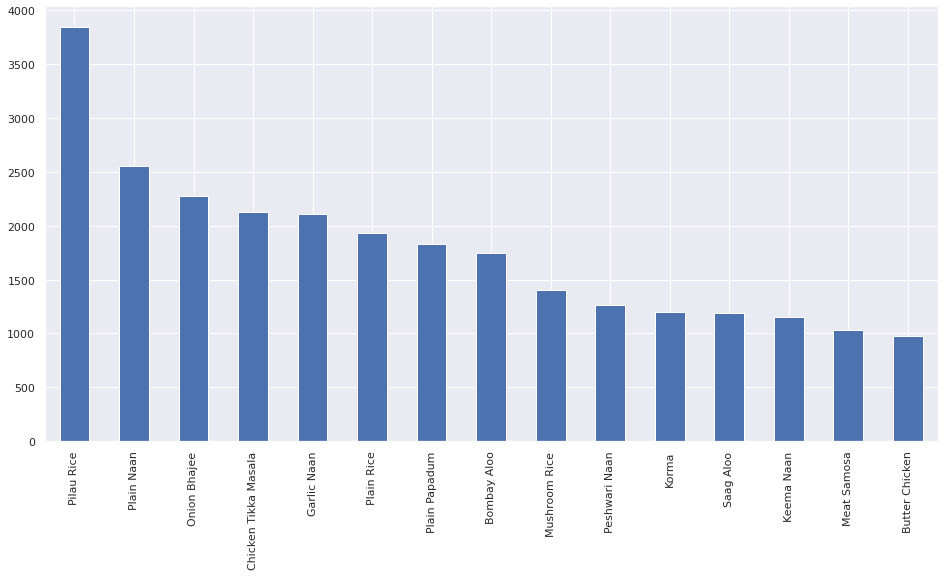

In [18]:
df['Item_Name'].value_counts()[:15].plot(kind = 'bar')
plt.show()

In [19]:
member = df
member

,Order_Number,Item_Name,Quantity,Product_Price,Total_products,total_cost,Date,Time,day,month,year,date_name,season
0,6769,Korma,25,8.95,8,1790.0,2017-09-18,16:54:00,18,9,2017,Monday,autumn
1,6769,Chicken Tikka Masala,25,8.95,8,1790.0,2017-09-18,16:54:00,18,9,2017,Monday,autumn
2,9374,House white wine 75cl,2,17.95,46,1651.4,2018-04-29,14:16:00,29,4,2018,Sunday,spring
3,9374,House Red wine 75cl,2,17.95,46,1651.4,2018-04-29,14:16:00,29,4,2018,Sunday,spring
4,6769,Chicken Biryani,20,9.95,8,1592.0,2017-09-18,16:54:00,18,9,2017,Monday,autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61722,8523,Plain Papadum,2,0.80,9,14.4,2018-02-14,22:57:00,14,2,2018,Wednesday,winter
61723,10315,Plain Papadum,2,0.80,9,14.4,2018-07-14,22:59:00,14,7,2018,Saturday,monsoon
61724,8013,Spicy Papadum,2,0.80,9,14.4,2017-12-31,20:38:00,31,12,2017,Sunday,winter
61725,8013,Plain Papadum,2,0.80,9,14.4,2017-12-31,20:38:00,31,12,2017,Sunday,winter


In [20]:
transactions_members = [a[1]['Item_Name'].tolist() for a in list(member.groupby('Order_Number'))]

In [21]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [22]:
te1 = TransactionEncoder()

In [23]:
te_ary1 = te1.fit(transactions_members).transform(transactions_members)

In [24]:
te1.columns_

['Aloo Chaat',
 'Aloo Gobi',
 'Aloo Methi',
 'Baingan Hari Mirch',
 'Bengal Fish Biryani',
 'Bengal Fish Karahi',
 'Bengal Fry Fish',
 'Bengal King Prawn',
 'Bengal Salad',
 'Bhindi Bhajee',
 'Bhuna',
 'Bhuna - Chicken',
 'Bhuna - Chicken Tikka',
 'Bhuna - King Prawn',
 'Bhuna - Lamb',
 'Bhuna - Prawn',
 'Bombay Aloo',
 'Bottle Coke',
 'Bottle Diet Coke',
 'Brinjal Bhajee',
 'Butter Chicken',
 'COBRA ( LARGE )',
 'COBRA (330ML)',
 'COBRA (660ML)',
 'Cauliflower Bhajee',
 'Chana Masala',
 'Chapati',
 'Chicken Achar',
 'Chicken Balti',
 'Chicken Biryani',
 'Chicken Chaat',
 'Chicken Chaat Main',
 'Chicken Chilli Garlic',
 'Chicken Hari Mirch',
 'Chicken Haryali',
 'Chicken Karahi',
 'Chicken Mysore',
 'Chicken Pakora',
 'Chicken Rezala',
 'Chicken Roshni',
 'Chicken Shashlick',
 'Chicken Shashlick Curry',
 'Chicken Sylhet',
 'Chicken Tikka',
 'Chicken Tikka (Main)',
 'Chicken Tikka Balti',
 'Chicken Tikka Biryani',
 'Chicken Tikka Chilli Masala',
 'Chicken Tikka Garlic',
 'Chicken Tikka 

In [25]:
a = te1.columns_

In [26]:
te_ary1

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False]])

In [27]:
transactions_members = pd.DataFrame(te_ary1, columns=a)
pf1 = transactions_members.describe()

In [28]:
transactions_members

,Aloo Chaat,Aloo Gobi,Aloo Methi,Baingan Hari Mirch,Bengal Fish Biryani,Bengal Fish Karahi,Bengal Fry Fish,Bengal King Prawn,Bengal Salad,Bhindi Bhajee,...,Vegetable Rice,Vegetable Roll,Vegetable Samosa,Vindaloo,Vindaloo - Chicken,Vindaloo - Chicken Tikka,Vindaloo - King Prawn,Vindaloo - Lamb,Vindaloo - Prawn,Vindaloo Sauce
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13083,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13084,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13085,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13086,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [29]:
f = pf1.iloc[0]-pf1.iloc[3]
a = f.tolist()
b = list(f.index)
item1 = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item1 = item1.sort_values(['Count'], ascending=False).head(50)

In [30]:
import matplotlib.pyplot as plt

In [31]:
freq_items1 = apriori(transactions_members, min_support=0.001, use_colnames=True)
freq_items1.sort_values('support', ascending= False).head(10)

,support,itemsets
168,0.293857,(Pilau Rice)
169,0.195064,(Plain Naan)
151,0.174129,(Onion Bhajee)
51,0.162821,(Chicken Tikka Masala)
78,0.160987,(Garlic Naan)
171,0.147616,(Plain Rice)
170,0.139594,(Plain Papadum)
16,0.133634,(Bombay Aloo)
149,0.107350,(Mushroom Rice)
167,0.096883,(Peshwari Naan)


In [32]:
freq_items1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6917 entries, 0 to 6916
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   6917 non-null   float64
 1   itemsets  6917 non-null   object 
dtypes: float64(1), object(1)
memory usage: 108.2+ KB


In [33]:
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))

In [34]:
freq_items_1 = (freq_items1['length'] == 1)
freq_items1[freq_items_1].sort_values('support', ascending= False).head(10)

,support,itemsets,length
168,0.293857,(Pilau Rice),1
169,0.195064,(Plain Naan),1
151,0.174129,(Onion Bhajee),1
51,0.162821,(Chicken Tikka Masala),1
78,0.160987,(Garlic Naan),1
171,0.147616,(Plain Rice),1
170,0.139594,(Plain Papadum),1
16,0.133634,(Bombay Aloo),1
149,0.107350,(Mushroom Rice),1
167,0.096883,(Peshwari Naan),1


In [35]:
freq_items_2 = (freq_items1['length'] == 2)
freq_items1[freq_items_2].sort_values('support', ascending= False).head(10)

,support,itemsets,length
2294,0.096501,"(Plain Naan, Pilau Rice)",2
2295,0.078010,"(Plain Papadum, Pilau Rice)",2
1236,0.077094,"(Pilau Rice, Chicken Tikka Masala)",2
2171,0.076711,"(Onion Bhajee, Pilau Rice)",2
1560,0.073120,"(Pilau Rice, Garlic Naan)",2
512,0.059749,"(Bombay Aloo, Pilau Rice)",2
1237,0.053331,"(Plain Naan, Chicken Tikka Masala)",2
2337,0.052644,"(Plain Rice, Plain Naan)",2
2336,0.052109,"(Plain Papadum, Plain Naan)",2
2265,0.049435,"(Peshwari Naan, Pilau Rice)",2


In [36]:
freq_items_3 = (freq_items1['length'] == 3)
freq_items1[freq_items_3].sort_values('support', ascending= False).head(10)

,support,itemsets,length
3981,0.032855,"(Plain Naan, Pilau Rice, Chicken Tikka Masala)",3
5141,0.029722,"(Plain Papadum, Plain Naan, Pilau Rice)",3
5039,0.027659,"(Onion Bhajee, Plain Naan, Pilau Rice)",3
3982,0.025749,"(Plain Papadum, Pilau Rice, Chicken Tikka Masala)",3
3018,0.023762,"(Bombay Aloo, Plain Naan, Pilau Rice)",3
5040,0.022311,"(Plain Papadum, Onion Bhajee, Pilau Rice)",3
4437,0.021776,"(Plain Papadum, Pilau Rice, Garlic Naan)",3
3840,0.020553,"(Pilau Rice, Garlic Naan, Chicken Tikka Masala)",3
3957,0.020400,"(Onion Bhajee, Pilau Rice, Chicken Tikka Masala)",3
2835,0.019789,"(Bombay Aloo, Pilau Rice, Chicken Tikka Masala)",3


In [37]:
freq_items_4 = (freq_items1['length'] == 4)
freq_items1[freq_items_4].sort_values('support', ascending= False).head(10)

,support,itemsets,length
6068,0.012683,"(Plain Papadum, Plain Naan, Pilau Rice, Chicken Tikka Masala)",4
5435,0.011232,"(Bombay Aloo, Plain Naan, Pilau Rice, Chicken Tikka Masala)",4
6049,0.010086,"(Onion Bhajee, Plain Naan, Pilau Rice, Chicken Tikka Masala)",4
6509,0.008787,"(Onion Bhajee, Plain Papadum, Plain Naan, Pilau Rice)",4
5585,0.008481,"(Plain Papadum, Bombay Aloo, Plain Naan, Pilau Rice)",4
6069,0.008175,"(Plain Rice, Plain Naan, Pilau Rice, Chicken Tikka Masala)",4
5916,0.008099,"(Plain Papadum, Pilau Rice, Garlic Naan, Chicken Tikka Masala)",4
5436,0.007488,"(Plain Papadum, Bombay Aloo, Pilau Rice, Chicken Tikka Masala)",4
5439,0.007335,"(Plain Papadum, Bombay Aloo, Plain Naan, Chicken Tikka Masala)",4
6050,0.006877,"(Plain Papadum, Onion Bhajee, Pilau Rice, Chicken Tikka Masala)",4


In [38]:
freq_items_5 = (freq_items1['length'] == 5)
freq_items1[freq_items_5].sort_values('support', ascending= False).head(10)

,support,itemsets,length
6637,0.004661,"(Chicken Tikka Masala, Plain Papadum, Bombay Aloo, Plain Naan, Pilau Rice)",5
6607,0.003591,"(Chicken Tikka Masala, Plain Papadum, Bombay Aloo, Pilau Rice, Garlic Naan)",5
6803,0.003438,"(Chicken Tikka Masala, Plain Papadum, Onion Bhajee, Plain Naan, Pilau Rice)",5
6606,0.003362,"(Chicken Tikka Masala, Bombay Aloo, Plain Naan, Pilau Rice, Garlic Naan)",5
6813,0.003285,"(Chicken Tikka Masala, Plain Rice, Plain Papadum, Plain Naan, Pilau Rice)",5
6640,0.003209,"(Chicken Tikka Masala, Plain Rice, Plain Papadum, Bombay Aloo, Plain Naan)",5
6753,0.002903,"(Chicken Tikka Masala, Plain Papadum, Plain Naan, Pilau Rice, Garlic Naan)",5
6638,0.002827,"(Chicken Tikka Masala, Plain Rice, Bombay Aloo, Plain Naan, Pilau Rice)",5
6630,0.002751,"(Chicken Tikka Masala, Bombay Aloo, Onion Bhajee, Plain Naan, Pilau Rice)",5
6658,0.002598,"(Plain Papadum, Bombay Aloo, Plain Naan, Pilau Rice, Garlic Naan)",5


In [39]:
freq_items_6 = (freq_items1['length'] == 6)
freq_items1[freq_items_6].sort_values('support', ascending= False).head(10)

,support,itemsets,length
6883,0.001987,"(Chicken Tikka Masala, Bombay Aloo, Plain Papadum, Plain Naan, Pilau Rice, Garlic Naan)",6
6885,0.001605,"(Chicken Tikka Masala, Plain Rice, Plain Papadum, Bombay Aloo, Plain Naan, Mushroom Bhajee)",6
6869,0.001528,"(Chicken Tikka Masala, Plain Rice, Bombay Aloo, Plain Papadum, Butter Chicken, Plain Naan)",6
6880,0.001452,"(Chicken Tikka Masala, Bombay Aloo, Pilau Rice, Plain Naan, Masala Sauce, Garlic Naan)",6
6905,0.001452,"(Chicken Tikka Masala, Plain Rice, Plain Papadum, Plain Naan, Mushroom Bhajee, Special Fried Rice)",6
6893,0.001452,"(Plain Rice, Plain Papadum, Bombay Aloo, Plain Naan, Mushroom Bhajee, Special Fried Rice)",6
6886,0.001452,"(Chicken Tikka Masala, Bombay Aloo, Plain Papadum, Plain Naan, Mushroom Bhajee, Special Fried Rice)",6
6864,0.001452,"(Chicken Tikka Masala, Plain Rice, Bombay Aloo, Butter Chicken, Plain Naan, Mushroom Bhajee)",6
6863,0.001452,"(Chicken Tikka Masala, Bombay Aloo, Plain Papadum, Butter Chicken, Plain Naan, Mushroom Bhajee)",6
6894,0.001375,"(Chicken Tikka Masala, Plain Rice, Plain Papadum, Butter Chicken, Plain Naan, Mushroom Bhajee)",6


In [40]:
freq_items_7 = (freq_items1['length'] == 7)
freq_items1[freq_items_7].sort_values('support', ascending= False).head(10)

,support,itemsets,length
6907,0.001375,"(Chicken Tikka Masala, Plain Rice, Bombay Aloo, Plain Papadum, Butter Chicken, Plain Naan, Mushroom Bhajee)",7
6914,0.001375,"(Chicken Tikka Masala, Plain Rice, Bombay Aloo, Plain Papadum, Plain Naan, Mushroom Bhajee, Special Fried Rice)",7
6908,0.001222,"(Chicken Tikka Masala, Bombay Aloo, Plain Papadum, Butter Chicken, Plain Naan, Mushroom Bhajee, Special Fried Rice)",7
6909,0.001222,"(Chicken Tikka Masala, Plain Rice, Bombay Aloo, Butter Chicken, Plain Naan, Mushroom Bhajee, Special Fried Rice)",7
6910,0.001222,"(Chicken Tikka Masala, Plain Rice, Bombay Aloo, Plain Papadum, Butter Chicken, Mushroom Bhajee, Special Fried Rice)",7
6911,0.001222,"(Chicken Tikka Masala, Plain Rice, Bombay Aloo, Plain Papadum, Butter Chicken, Plain Naan, Special Fried Rice)",7
6912,0.001222,"(Plain Rice, Bombay Aloo, Plain Papadum, Butter Chicken, Plain Naan, Mushroom Bhajee, Special Fried Rice)",7
6915,0.001222,"(Chicken Tikka Masala, Plain Rice, Plain Papadum, Butter Chicken, Plain Naan, Mushroom Bhajee, Special Fried Rice)",7
6913,0.001070,"(Chicken Tikka Masala, Bombay Aloo, Plain Papadum, Pilau Rice, Plain Naan, Masala Sauce, Garlic Naan)",7


In [41]:
freq_items_8 = (freq_items1['length'] == 8)
freq_items1[freq_items_8].sort_values('support', ascending= False).head(10)

,support,itemsets,length
6916,0.001222,"(Chicken Tikka Masala, Plain Rice, Bombay Aloo, Plain Papadum, Butter Chicken, Plain Naan, Mushroom Bhajee, Special Fried Rice)",8


In [42]:
rules1 = association_rules(freq_items1, metric="confidence", min_threshold=0.001)
rules1.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bombay Aloo),(Aloo Chaat),0.133634,0.021241,0.001834,0.013722,0.646026,-0.001005,0.992377
1,(Aloo Chaat),(Bombay Aloo),0.021241,0.133634,0.001834,0.086331,0.646026,-0.001005,0.948228
2,(Aloo Chaat),(Chana Masala),0.021241,0.028881,0.001146,0.053957,1.868220,0.000533,1.026506
3,(Chana Masala),(Aloo Chaat),0.028881,0.021241,0.001146,0.039683,1.868220,0.000533,1.019204
4,(Chapati),(Aloo Chaat),0.050428,0.021241,0.001452,0.028788,1.355308,0.000381,1.007771
5,(Aloo Chaat),(Chapati),0.021241,0.050428,0.001452,0.068345,1.355308,0.000381,1.019232
6,(Chicken Chaat),(Aloo Chaat),0.025520,0.021241,0.001299,0.050898,2.396243,0.000757,1.031248
7,(Aloo Chaat),(Chicken Chaat),0.021241,0.025520,0.001299,0.061151,2.396243,0.000757,1.037952
8,(Chicken Tikka),(Aloo Chaat),0.052338,0.021241,0.002063,0.039416,1.855674,0.000951,1.018921
9,(Aloo Chaat),(Chicken Tikka),0.021241,0.052338,0.002063,0.097122,1.855674,0.000951,1.049602


In [43]:
top_support = rules1.sort_values('support', ascending= False)
top_support.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4149,(Pilau Rice),(Plain Naan),0.293857,0.195064,0.096501,0.328393,1.683513,0.039180,1.198522
4148,(Plain Naan),(Pilau Rice),0.195064,0.293857,0.096501,0.494712,1.683513,0.039180,1.397506
4150,(Plain Papadum),(Pilau Rice),0.139594,0.293857,0.078010,0.558840,1.901740,0.036990,1.600649
4151,(Pilau Rice),(Plain Papadum),0.293857,0.139594,0.078010,0.265471,1.901740,0.036990,1.171371
2032,(Pilau Rice),(Chicken Tikka Masala),0.293857,0.162821,0.077094,0.262350,1.611283,0.029247,1.134928
2033,(Chicken Tikka Masala),(Pilau Rice),0.162821,0.293857,0.077094,0.473487,1.611283,0.029247,1.341168
3903,(Pilau Rice),(Onion Bhajee),0.293857,0.174129,0.076711,0.261050,1.499179,0.025542,1.117628
3902,(Onion Bhajee),(Pilau Rice),0.174129,0.293857,0.076711,0.440544,1.499179,0.025542,1.262196
2681,(Garlic Naan),(Pilau Rice),0.160987,0.293857,0.073120,0.454200,1.545651,0.025813,1.293777
2680,(Pilau Rice),(Garlic Naan),0.293857,0.160987,0.073120,0.248830,1.545651,0.025813,1.116941


In [44]:
top_confidence = rules1.sort_values('confidence', ascending= False)
top_confidence.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
51782,"(Butter Chicken, Plain Rice, Mushroom Bhajee, Special Fried Rice)","(Plain Papadum, Bombay Aloo, Plain Naan)",0.001222,0.013295,0.001222,1.0,75.218391,0.001206,inf
39320,"(Vindaloo, Aloo Gobi, Chicken Biryani, Pilau Rice)",(Plain Naan),0.001146,0.195064,0.001146,1.0,5.126518,0.000923,inf
52328,"(Plain Papadum, Bombay Aloo, Butter Chicken, Mushroom Bhajee, Special Fried Rice)","(Plain Rice, Plain Naan, Chicken Tikka Masala)",0.001222,0.017726,0.001222,1.0,56.413793,0.001201,inf
49127,"(Bombay Aloo, Butter Chicken, Plain Naan, Mushroom Bhajee, Special Fried Rice)",(Plain Rice),0.001222,0.147616,0.001222,1.0,6.774327,0.001042,inf
49126,"(Plain Rice, Butter Chicken, Plain Naan, Mushroom Bhajee, Special Fried Rice)",(Bombay Aloo),0.001222,0.133634,0.001222,1.0,7.483133,0.001059,inf
52325,"(Plain Rice, Butter Chicken, Plain Naan, Mushroom Bhajee, Special Fried Rice)","(Plain Papadum, Bombay Aloo, Chicken Tikka Masala)",0.001222,0.011461,0.001222,1.0,87.253333,0.001208,inf
49124,"(Plain Rice, Bombay Aloo, Butter Chicken, Mushroom Bhajee, Special Fried Rice)",(Plain Naan),0.001222,0.195064,0.001222,1.0,5.126518,0.000984,inf
49123,"(Plain Rice, Bombay Aloo, Butter Chicken, Plain Naan, Special Fried Rice)",(Mushroom Bhajee),0.001222,0.025061,0.001222,1.0,39.902439,0.001192,inf
52323,"(Plain Rice, Plain Papadum, Butter Chicken, Mushroom Bhajee, Special Fried Rice)","(Bombay Aloo, Plain Naan, Chicken Tikka Masala)",0.001222,0.016427,0.001222,1.0,60.874419,0.001202,inf
44422,"(Chicken Tikka Garlic, Saag Aloo, Onion Bhajee, Special Fried Rice)",(Plain Papadum),0.001070,0.139594,0.001070,1.0,7.163656,0.000920,inf


In [45]:
top_lift = rules1.sort_values('lift', ascending= False)
top_lift.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
52369,"(Plain Papadum, Plain Rice, Bombay Aloo, Mushroom Bhajee)","(Butter Chicken, Special Fried Rice, Plain Naan, Chicken Tikka Masala)",0.001681,0.001222,0.001222,0.727273,594.909091,0.00122,3.662184
52364,"(Butter Chicken, Special Fried Rice, Plain Naan, Chicken Tikka Masala)","(Plain Papadum, Plain Rice, Bombay Aloo, Mushroom Bhajee)",0.001222,0.001681,0.001222,1.000000,594.909091,0.00122,inf
52355,"(Bombay Aloo, Special Fried Rice, Plain Naan, Chicken Tikka Masala)","(Butter Chicken, Plain Rice, Plain Papadum, Mushroom Bhajee)",0.001528,0.001375,0.001222,0.800000,581.688889,0.00122,4.993123
52378,"(Butter Chicken, Plain Rice, Plain Papadum, Mushroom Bhajee)","(Bombay Aloo, Special Fried Rice, Plain Naan, Chicken Tikka Masala)",0.001375,0.001528,0.001222,0.888889,581.688889,0.00122,8.986247
52300,"(Chicken Tikka Masala, Plain Papadum, Bombay Aloo, Plain Naan, Special Fried Rice)","(Butter Chicken, Plain Rice, Mushroom Bhajee)",0.001452,0.001452,0.001222,0.842105,580.077562,0.00122,6.324139
52433,"(Butter Chicken, Plain Rice, Mushroom Bhajee)","(Chicken Tikka Masala, Plain Papadum, Bombay Aloo, Plain Naan, Special Fried Rice)",0.001452,0.001452,0.001222,0.842105,580.077562,0.00122,6.324139
51441,"(Butter Chicken, Plain Rice, Mushroom Bhajee)","(Bombay Aloo, Special Fried Rice, Plain Naan, Chicken Tikka Masala)",0.001452,0.001528,0.001222,0.842105,551.073684,0.00122,6.323655
51400,"(Bombay Aloo, Special Fried Rice, Plain Naan, Chicken Tikka Masala)","(Butter Chicken, Plain Rice, Mushroom Bhajee)",0.001528,0.001452,0.001222,0.800000,551.073684,0.00122,4.992741
52372,"(Butter Chicken, Plain Rice, Bombay Aloo, Mushroom Bhajee)","(Plain Papadum, Special Fried Rice, Plain Naan, Chicken Tikka Masala)",0.001452,0.001528,0.001222,0.842105,551.073684,0.00122,6.323655
52156,"(Plain Papadum, Special Fried Rice, Plain Naan, Chicken Tikka Masala)","(Butter Chicken, Plain Rice, Mushroom Bhajee)",0.001528,0.001452,0.001222,0.800000,551.073684,0.00122,4.992741


In [46]:
df1 = df['season'] == 'winter'

In [47]:
winter = df.loc[df1].sort_values('Date', ascending = True)

In [48]:
transactions_six = [a[1]['Item_Name'].tolist() for a in list(winter.groupby('Order_Number'))]

In [49]:
te1 = TransactionEncoder()

In [50]:
te_ary1 = te1.fit(transactions_six).transform(transactions_six)

In [51]:
a = te1.columns_

In [52]:
transactions_six = pd.DataFrame(te_ary1, columns=a)
pf1 = transactions_six.describe()

In [53]:
f = pf1.iloc[0]-pf1.iloc[3]
a = f.tolist()
b = list(f.index)
item1 = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item1 = item1.sort_values(['Count'], ascending=False).head(50)

In [54]:
freq_items1 = apriori(transactions_six, min_support=0.001, use_colnames=True)
freq_items1.head(7)

,support,itemsets
0,0.016614,(Aloo Chaat)
1,0.047398,(Aloo Gobi)
2,0.002932,(Aloo Methi)
3,0.015392,(Baingan Hari Mirch)
4,0.002443,(Bengal Fish Biryani)
5,0.001710,(Bengal Fry Fish)
6,0.008796,(Bengal King Prawn)


In [55]:
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))

In [ ]:
freq_items1.head()

,support,itemsets,length
0,0.016614,(Aloo Chaat),1
1,0.047398,(Aloo Gobi),1
2,0.002932,(Aloo Methi),1
3,0.015392,(Baingan Hari Mirch),1
4,0.002443,(Bengal Fish Biryani),1


In [56]:
rules2 = association_rules(freq_items1, metric="confidence", min_threshold=0.001)
rules2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bombay Aloo),(Aloo Chaat),0.139018,0.016614,0.001466,0.010545,0.634705,-0.000844,0.993866
1,(Aloo Chaat),(Bombay Aloo),0.016614,0.139018,0.001466,0.088235,0.634705,-0.000844,0.944303
2,(Aloo Chaat),(Chana Masala),0.016614,0.031517,0.001710,0.102941,3.266188,0.001187,1.079620
3,(Chana Masala),(Aloo Chaat),0.031517,0.016614,0.001710,0.054264,3.266188,0.001187,1.039810
4,(Chapati),(Aloo Chaat),0.054728,0.016614,0.001955,0.035714,2.149685,0.001045,1.019808
5,(Aloo Chaat),(Chapati),0.016614,0.054728,0.001955,0.117647,2.149685,0.001045,1.071309
6,(Aloo Chaat),(Chicken Tikka Masala),0.016614,0.174688,0.002443,0.147059,0.841835,-0.000459,0.967607
7,(Chicken Tikka Masala),(Aloo Chaat),0.174688,0.016614,0.002443,0.013986,0.841835,-0.000459,0.997335
8,(Garlic Naan),(Aloo Chaat),0.172734,0.016614,0.003420,0.019802,1.191904,0.000551,1.003253
9,(Aloo Chaat),(Garlic Naan),0.016614,0.172734,0.003420,0.205882,1.191904,0.000551,1.041742


In [57]:
top_support2 = rules2.sort_values('support', ascending= False)
top_support2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4035,(Pilau Rice),(Plain Naan),0.306132,0.206206,0.102614,0.335196,1.625539,0.039488,1.194027
4034,(Plain Naan),(Pilau Rice),0.206206,0.306132,0.102614,0.497630,1.625539,0.039488,1.381189
1922,(Pilau Rice),(Chicken Tikka Masala),0.306132,0.174688,0.086245,0.281724,1.612721,0.032767,1.149017
1923,(Chicken Tikka Masala),(Pilau Rice),0.174688,0.306132,0.086245,0.493706,1.612721,0.032767,1.370484
2551,(Garlic Naan),(Pilau Rice),0.172734,0.306132,0.080381,0.465347,1.520082,0.027502,1.297789
2550,(Pilau Rice),(Garlic Naan),0.306132,0.172734,0.080381,0.262570,1.520082,0.027502,1.121823
4036,(Plain Papadum),(Pilau Rice),0.143660,0.306132,0.079648,0.554422,1.811052,0.035669,1.557230
4037,(Pilau Rice),(Plain Papadum),0.306132,0.143660,0.079648,0.260176,1.811052,0.035669,1.157491
3777,(Pilau Rice),(Onion Bhajee),0.306132,0.181774,0.079404,0.259377,1.426925,0.023757,1.104782
3776,(Onion Bhajee),(Pilau Rice),0.181774,0.306132,0.079404,0.436828,1.426925,0.023757,1.232070


In [58]:
top_confidence2 = rules2.sort_values('confidence', ascending= False)
top_confidence2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
61216,"(Onion Bhajee, Mushroom Bhajee, Chapati, Meat Samosa)",(Pilau Rice),0.001222,0.306132,0.001222,1.0,3.266560,0.000848,inf
36419,"(Plain Papadum, Chicken Tikka Garlic, Chicken Tikka Masala)",(Plain Naan),0.001710,0.206206,0.001710,1.0,4.849526,0.001358,inf
36236,"(Plain Naan, Onion Bhajee, Chicken Tikka Balti)",(Pilau Rice),0.001466,0.306132,0.001466,1.0,3.266560,0.001017,inf
78201,"(Chicken Tikka Masala, Plain Rice, Plain Papadum, Keema Naan, Pilau Rice)",(Peshwari Naan),0.001466,0.100415,0.001466,1.0,9.958637,0.001319,inf
62146,"(Chicken Tikka Garlic, Plain Papadum, Onion Bhajee, Special Fried Rice)",(Pilau Rice),0.001222,0.306132,0.001222,1.0,3.266560,0.000848,inf
62147,"(Plain Papadum, Chicken Tikka Garlic, Pilau Rice, Special Fried Rice)",(Onion Bhajee),0.001222,0.181774,0.001222,1.0,5.501344,0.001000,inf
62148,"(Chicken Tikka Garlic, Onion Bhajee, Pilau Rice, Special Fried Rice)",(Plain Papadum),0.001222,0.143660,0.001222,1.0,6.960884,0.001046,inf
62154,"(Plain Papadum, Chicken Tikka Garlic, Special Fried Rice)","(Onion Bhajee, Pilau Rice)",0.001222,0.079404,0.001222,1.0,12.593846,0.001125,inf
62157,"(Chicken Tikka Garlic, Onion Bhajee, Special Fried Rice)","(Plain Papadum, Pilau Rice)",0.001222,0.079648,0.001222,1.0,12.555215,0.001124,inf
62158,"(Chicken Tikka Garlic, Pilau Rice, Special Fried Rice)","(Plain Papadum, Onion Bhajee)",0.001222,0.042023,0.001222,1.0,23.796512,0.001170,inf


In [59]:
top_lift2 = rules2.sort_values('lift', ascending= False)
top_lift2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
81192,"(Paratha, Onion Bhajee, Butter Chicken, Pilau Rice)","(Keema Naan, Chicken Tikka (Main), Tandoori Fish)",0.001222,0.001710,0.001222,1.000000,584.714286,0.00122,inf
81221,"(Keema Naan, Chicken Tikka (Main), Tandoori Fish)","(Paratha, Onion Bhajee, Butter Chicken, Pilau Rice)",0.001710,0.001222,0.001222,0.714286,584.714286,0.00122,3.495724
81225,"(Paratha, Butter Chicken, Chicken Tikka (Main))","(Keema Naan, Onion Bhajee, Pilau Rice, Tandoori Fish)",0.001222,0.001710,0.001222,1.000000,584.714286,0.00122,inf
52371,"(Saag Bhajee, Chicken Tikka (Main), Chicken Tikka)","(Cauliflower Bhajee, Aloo Gobi)",0.001222,0.001710,0.001222,1.000000,584.714286,0.00122,inf
81214,"(Butter Chicken, Keema Naan, Tandoori Fish)","(Paratha, Onion Bhajee, Pilau Rice, Chicken Tikka (Main))",0.001222,0.001710,0.001222,1.000000,584.714286,0.00122,inf
81176,"(Paratha, Keema Naan, Onion Bhajee, Pilau Rice)","(Butter Chicken, Chicken Tikka (Main), Tandoori Fish)",0.001710,0.001222,0.001222,0.714286,584.714286,0.00122,3.495724
76315,"(Onion Bhajee, Pilau Rice, Tandoori Fish)","(Paratha, Butter Chicken, Chicken Tikka (Main))",0.001710,0.001222,0.001222,0.714286,584.714286,0.00122,3.495724
81180,"(Paratha, Keema Naan, Pilau Rice, Chicken Tikka (Main))","(Butter Chicken, Onion Bhajee, Tandoori Fish)",0.001710,0.001222,0.001222,0.714286,584.714286,0.00122,3.495724
76302,"(Paratha, Butter Chicken, Chicken Tikka (Main))","(Onion Bhajee, Pilau Rice, Tandoori Fish)",0.001222,0.001710,0.001222,1.000000,584.714286,0.00122,inf
81188,"(Keema Naan, Onion Bhajee, Pilau Rice, Tandoori Fish)","(Paratha, Butter Chicken, Chicken Tikka (Main))",0.001710,0.001222,0.001222,0.714286,584.714286,0.00122,3.495724


In [60]:
df1 = df['season'] == 'spring'

In [61]:
spring = df.loc[df1].sort_values('Date', ascending = True)

In [62]:
transactions_six = [a[1]['Item_Name'].tolist() for a in list(spring.groupby('Order_Number'))]

In [63]:
te1 = TransactionEncoder()

In [64]:
te_ary1 = te1.fit(transactions_six).transform(transactions_six)

In [65]:
a = te1.columns_

In [66]:
transactions_six = pd.DataFrame(te_ary1, columns=a)
pf1 = transactions_six.describe()

In [67]:
f = pf1.iloc[0]-pf1.iloc[3]
a = f.tolist()
b = list(f.index)
item1 = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item1 = item1.sort_values(['Count'], ascending=False).head(50)

In [68]:
freq_items1 = apriori(transactions_six, min_support=0.001, use_colnames=True)
freq_items1.head(7)

,support,itemsets
0,0.021294,(Aloo Chaat)
1,0.036326,(Aloo Gobi)
2,0.002923,(Aloo Methi)
3,0.014614,(Baingan Hari Mirch)
4,0.001253,(Bengal Fish Karahi)
5,0.001670,(Bengal Fry Fish)
6,0.006681,(Bengal King Prawn)


In [69]:
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))

In [70]:
freq_items1.head()

,support,itemsets,length
0,0.021294,(Aloo Chaat),1
1,0.036326,(Aloo Gobi),1
2,0.002923,(Aloo Methi),1
3,0.014614,(Baingan Hari Mirch),1
4,0.001253,(Bengal Fish Karahi),1


In [71]:
rules2 = association_rules(freq_items1, metric="confidence", min_threshold=0.001)
rules2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Chapati),(Aloo Chaat),0.044676,0.021294,0.001253,0.028037,1.316658,0.000301,1.006938
1,(Aloo Chaat),(Chapati),0.021294,0.044676,0.001253,0.058824,1.316658,0.000301,1.015031
2,(Chicken Biryani),(Aloo Chaat),0.051775,0.021294,0.001253,0.024194,1.136148,0.000150,1.002971
3,(Aloo Chaat),(Chicken Biryani),0.021294,0.051775,0.001253,0.058824,1.136148,0.000150,1.007490
4,(Chicken Tikka),(Aloo Chaat),0.060125,0.021294,0.002088,0.034722,1.630583,0.000807,1.013911
5,(Aloo Chaat),(Chicken Tikka),0.021294,0.060125,0.002088,0.098039,1.630583,0.000807,1.042035
6,(Aloo Chaat),(Egg Rice),0.021294,0.026305,0.001670,0.078431,2.981637,0.001110,1.056563
7,(Egg Rice),(Aloo Chaat),0.026305,0.021294,0.001670,0.063492,2.981637,0.001110,1.045059
8,(Garlic Naan),(Aloo Chaat),0.164927,0.021294,0.001670,0.010127,0.475552,-0.001842,0.988718
9,(Aloo Chaat),(Garlic Naan),0.021294,0.164927,0.001670,0.078431,0.475552,-0.001842,0.906143


In [72]:
top_support2 = rules2.sort_values('support', ascending= False)
top_support2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4284,(Plain Naan),(Pilau Rice),0.182463,0.291441,0.092276,0.505721,1.735246,0.039098,1.433521
4285,(Pilau Rice),(Plain Naan),0.291441,0.182463,0.092276,0.316619,1.735246,0.039098,1.196311
4286,(Plain Papadum),(Pilau Rice),0.146555,0.291441,0.086430,0.589744,2.023547,0.043718,1.727114
4287,(Pilau Rice),(Plain Papadum),0.291441,0.146555,0.086430,0.296562,2.023547,0.043718,1.213247
4019,(Pilau Rice),(Onion Bhajee),0.291441,0.182881,0.081420,0.279370,1.527603,0.028121,1.133895
4018,(Onion Bhajee),(Pilau Rice),0.182881,0.291441,0.081420,0.445205,1.527603,0.028121,1.277157
2083,(Chicken Tikka Masala),(Pilau Rice),0.172443,0.291441,0.079332,0.460048,1.578533,0.029075,1.312265
2082,(Pilau Rice),(Chicken Tikka Masala),0.291441,0.172443,0.079332,0.272206,1.578533,0.029075,1.137077
2759,(Garlic Naan),(Pilau Rice),0.164927,0.291441,0.075157,0.455696,1.563599,0.027090,1.301772
2758,(Pilau Rice),(Garlic Naan),0.291441,0.164927,0.075157,0.257880,1.563599,0.027090,1.125253


In [73]:
top_confidence2 = rules2.sort_values('confidence', ascending= False)
top_confidence2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
369695,"(Curry - Chicken, Plain Naan, Pilau Rice, Persian Chicken Biryani)","(Meat Samosa, Korma - Chicken, Plain Papadum, Saag - Lamb, Butter Chicken)",0.001253,0.001670,0.001253,1.0,598.750000,0.001251,inf
287549,"(Plain Papadum, Chicken Tikka Jalfrezi, Bhuna - Chicken Tikka, Peshwari Naan, French Fries)","(Onion Bhajee, Chapati, Vegetable Roll)",0.001670,0.004593,0.001670,1.0,217.727273,0.001662,inf
133289,"(Onion Bhajee, Bhuna - Chicken Tikka, Pilau Rice, Chapati)","(Vegetable Roll, Meat Samosa)",0.003758,0.010856,0.003758,1.0,92.115385,0.003717,inf
133290,"(Bhuna - Chicken Tikka, Pilau Rice, Chapati, Vegetable Roll)","(Onion Bhajee, Meat Samosa)",0.003758,0.025052,0.003758,1.0,39.916667,0.003664,inf
133291,"(Onion Bhajee, Bhuna - Chicken Tikka, Chapati, Vegetable Roll)","(Pilau Rice, Meat Samosa)",0.003758,0.025470,0.003758,1.0,39.262295,0.003662,inf
133293,"(Bhuna - Chicken Tikka, Pilau Rice, Meat Samosa)","(Onion Bhajee, Chapati, Vegetable Roll)",0.003758,0.004593,0.003758,1.0,217.727273,0.003741,inf
133294,"(Onion Bhajee, Bhuna - Chicken Tikka, Meat Samosa)","(Pilau Rice, Chapati, Vegetable Roll)",0.003758,0.005428,0.003758,1.0,184.230769,0.003737,inf
133295,"(Bhuna - Chicken Tikka, Vegetable Roll, Meat Samosa)","(Onion Bhajee, Pilau Rice, Chapati)",0.003758,0.009186,0.003758,1.0,108.863636,0.003723,inf
133296,"(Bhuna - Chicken Tikka, Chapati, Meat Samosa)","(Onion Bhajee, Pilau Rice, Vegetable Roll)",0.003758,0.006263,0.003758,1.0,159.666667,0.003734,inf
133303,"(Onion Bhajee, Bhuna - Chicken Tikka, Pilau Rice)","(Chapati, Vegetable Roll, Meat Samosa)",0.003758,0.005010,0.003758,1.0,199.583333,0.003739,inf


In [74]:
top_lift2 = rules2.sort_values('lift', ascending= False)
top_lift2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
166278,"(Chicken Tikka Garlic, Plain Papadum, Saag Aloo)","(Special Fried Rice, Mushroom Bhajee, Chapati)",0.001253,0.001253,0.001253,1.0,798.333333,0.001251,inf
175712,"(Keema Naan, Royal Paneer, Pilau Rice)","(Plain Papadum, Garlic Naan, Chicken Tikka Jeera)",0.001253,0.001253,0.001253,1.0,798.333333,0.001251,inf
259126,"(Plain Rice, Plain Papadum, Chicken Tikka Jeera)","(Keema Naan, Onion Bhajee, Pilau Rice, Royal Paneer)",0.001253,0.001253,0.001253,1.0,798.333333,0.001251,inf
70042,"(Aloo Gobi, Plain Naan, Chicken Tikka Jalfrezi)","(Tarka Dall, Vindaloo - Chicken)",0.001253,0.001253,0.001253,1.0,798.333333,0.001251,inf
259131,"(Plain Rice, Keema Naan, Royal Paneer)","(Plain Papadum, Onion Bhajee, Pilau Rice, Chicken Tikka Jeera)",0.001253,0.001253,0.001253,1.0,798.333333,0.001251,inf
166205,"(Saag Aloo, Pilau Rice, Chapati, Special Fried Rice)","(Chicken Tikka Garlic, Mushroom Bhajee)",0.001253,0.001253,0.001253,1.0,798.333333,0.001251,inf
258798,"(Royal Paneer, Chicken Tikka Jeera)","(Plain Rice, Plain Papadum, Keema Naan, Onion Bhajee, Garlic Naan)",0.001253,0.001253,0.001253,1.0,798.333333,0.001251,inf
166202,"(Saag Aloo, Pilau Rice, Mushroom Bhajee, Special Fried Rice)","(Chicken Tikka Garlic, Chapati)",0.001253,0.001253,0.001253,1.0,798.333333,0.001251,inf
70040,"(Vindaloo - Chicken, Plain Naan, Chicken Tikka Jalfrezi)","(Tarka Dall, Aloo Gobi)",0.001253,0.001253,0.001253,1.0,798.333333,0.001251,inf
259133,"(Plain Rice, Onion Bhajee, Chicken Tikka Jeera)","(Plain Papadum, Keema Naan, Pilau Rice, Royal Paneer)",0.001253,0.001253,0.001253,1.0,798.333333,0.001251,inf


In [75]:
df1 = df['season'] == 'summer'

In [76]:
summer = df.loc[df1].sort_values('Date', ascending = True)

In [77]:
transactions_six = [a[1]['Item_Name'].tolist() for a in list(summer.groupby('Order_Number'))]

In [78]:
te1 = TransactionEncoder()

In [79]:
te_ary1 = te1.fit(transactions_six).transform(transactions_six)

In [80]:
a = te1.columns_

In [81]:
transactions_six = pd.DataFrame(te_ary1, columns=a)
pf1 = transactions_six.describe()

In [82]:
f = pf1.iloc[0]-pf1.iloc[3]
a = f.tolist()
b = list(f.index)
item1 = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item1 = item1.sort_values(['Count'], ascending=False).head(50)

In [91]:
freq_items1 = apriori(transactions_six, min_support=0.01, use_colnames=True)
freq_items1.head(7)

,support,itemsets
0,0.028221,(Aloo Chaat)
1,0.049898,(Aloo Gobi)
2,0.017996,(Baingan Hari Mirch)
3,0.021268,(Bhindi Bhajee)
4,0.021677,(Bhuna)
5,0.020450,(Bhuna - Chicken)
6,0.010634,(Bhuna - Chicken Tikka)


In [92]:
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))

In [93]:
freq_items1.head()

,support,itemsets,length
0,0.028221,(Aloo Chaat),1
1,0.049898,(Aloo Gobi),1
2,0.017996,(Baingan Hari Mirch),1
3,0.021268,(Bhindi Bhajee),1
4,0.021677,(Bhuna),1


In [94]:
rules2 = association_rules(freq_items1, metric="confidence", min_threshold=0.001)
rules2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Onion Bhajee),(Aloo Chaat),0.171779,0.028221,0.013088,0.076190,2.699793,0.008240,1.051926
1,(Aloo Chaat),(Onion Bhajee),0.028221,0.171779,0.013088,0.463768,2.699793,0.008240,1.544520
2,(Aloo Gobi),(Mushroom Rice),0.049898,0.098569,0.011452,0.229508,2.328413,0.006534,1.169943
3,(Mushroom Rice),(Aloo Gobi),0.098569,0.049898,0.011452,0.116183,2.328413,0.006534,1.074998
4,(Aloo Gobi),(Pilau Rice),0.049898,0.282618,0.016769,0.336066,1.189118,0.002667,1.080502
5,(Pilau Rice),(Aloo Gobi),0.282618,0.049898,0.016769,0.059334,1.189118,0.002667,1.010032
6,(Bhuna - Chicken),(Pilau Rice),0.020450,0.282618,0.013497,0.660000,2.335311,0.007717,2.109948
7,(Pilau Rice),(Bhuna - Chicken),0.282618,0.020450,0.013497,0.047757,2.335311,0.007717,1.028676
8,(Chicken Shashlick),(Bombay Aloo),0.030675,0.136605,0.011861,0.386667,2.830539,0.007671,1.407709
9,(Bombay Aloo),(Chicken Shashlick),0.136605,0.030675,0.011861,0.086826,2.830539,0.007671,1.061490


In [95]:
top_support2 = rules2.sort_values('support', ascending= False)
top_support2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
252,(Plain Naan),(Pilau Rice),0.189366,0.282618,0.095297,0.503240,1.780638,0.041778,1.444122
253,(Pilau Rice),(Plain Naan),0.282618,0.189366,0.095297,0.337192,1.780638,0.041778,1.223031
103,(Chicken Tikka Masala),(Pilau Rice),0.149284,0.282618,0.073620,0.493151,1.744940,0.031429,1.415376
102,(Pilau Rice),(Chicken Tikka Masala),0.282618,0.149284,0.073620,0.260492,1.744940,0.031429,1.150381
229,(Pilau Rice),(Onion Bhajee),0.282618,0.171779,0.069939,0.247467,1.440614,0.021391,1.100578
228,(Onion Bhajee),(Pilau Rice),0.171779,0.282618,0.069939,0.407143,1.440614,0.021391,1.210043
254,(Plain Papadum),(Pilau Rice),0.124744,0.282618,0.068712,0.550820,1.948993,0.033457,1.597092
255,(Pilau Rice),(Plain Papadum),0.282618,0.124744,0.068712,0.243126,1.948993,0.033457,1.156408
32,(Bombay Aloo),(Pilau Rice),0.136605,0.282618,0.058487,0.428144,1.514922,0.019880,1.254480
33,(Pilau Rice),(Bombay Aloo),0.282618,0.136605,0.058487,0.206946,1.514922,0.019880,1.088697


In [96]:
top_confidence2 = rules2.sort_values('confidence', ascending= False)
top_confidence2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
367,"(Korma - Chicken, Chicken Tikka Masala)",(Pilau Rice),0.014724,0.282618,0.011452,0.777778,2.752050,0.007291,3.228221
565,"(Plain Papadum, Plain Naan, Chicken Tikka Masala)",(Pilau Rice),0.015542,0.282618,0.011452,0.736842,2.607205,0.007060,2.726053
300,"(Bombay Aloo, Keema Naan)",(Pilau Rice),0.023722,0.282618,0.017178,0.724138,2.562254,0.010474,2.600511
391,"(Peshwari Naan, Chicken Tikka Masala)",(Pilau Rice),0.025358,0.282618,0.017178,0.677419,2.396947,0.010011,2.223885
403,"(Plain Papadum, Chicken Tikka Masala)",(Pilau Rice),0.033129,0.282618,0.022086,0.666667,2.358900,0.012723,2.152147
6,(Bhuna - Chicken),(Pilau Rice),0.020450,0.282618,0.013497,0.660000,2.335311,0.007717,2.109948
486,"(Korma - Chicken, Plain Papadum)",(Pilau Rice),0.017996,0.282618,0.011861,0.659091,2.332094,0.006775,2.104322
480,"(Korma - Chicken, Plain Naan)",(Pilau Rice),0.030675,0.282618,0.020041,0.653333,2.311722,0.011372,2.069372
474,"(Korma - Chicken, Onion Bhajee)",(Pilau Rice),0.016360,0.282618,0.010634,0.650000,2.299928,0.006010,2.049664
318,"(Bombay Aloo, Plain Naan)",(Pilau Rice),0.033538,0.282618,0.021677,0.646341,2.286982,0.012199,2.028461


In [97]:
top_confidence2 = rules2.sort_values('lift', ascending= False)
top_confidence2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
571,"(Plain Naan, Pilau Rice)","(Plain Papadum, Chicken Tikka Masala)",0.095297,0.033129,0.011452,0.120172,3.627404,0.008295,1.098932
570,"(Plain Papadum, Chicken Tikka Masala)","(Plain Naan, Pilau Rice)",0.033129,0.095297,0.011452,0.345679,3.627404,0.008295,1.382660
573,"(Pilau Rice, Chicken Tikka Masala)","(Plain Papadum, Plain Naan)",0.073620,0.043763,0.011452,0.155556,3.554517,0.008230,1.132386
568,"(Plain Papadum, Plain Naan)","(Pilau Rice, Chicken Tikka Masala)",0.043763,0.073620,0.011452,0.261682,3.554517,0.008230,1.254718
572,"(Plain Naan, Chicken Tikka Masala)","(Plain Papadum, Pilau Rice)",0.047035,0.068712,0.011452,0.243478,3.543478,0.008220,1.231013
569,"(Plain Papadum, Pilau Rice)","(Plain Naan, Chicken Tikka Masala)",0.068712,0.047035,0.011452,0.166667,3.543478,0.008220,1.143558
373,"(Onion Bhajee, Chicken Tikka Masala)",(Peshwari Naan),0.032720,0.094479,0.010634,0.325000,3.439935,0.007543,1.341513
376,(Peshwari Naan),"(Onion Bhajee, Chicken Tikka Masala)",0.094479,0.032720,0.010634,0.112554,3.439935,0.007543,1.089960
464,"(Keema Naan, Plain Naan)",(Plain Papadum),0.025358,0.124744,0.010634,0.419355,3.361713,0.007471,1.507385
465,(Plain Papadum),"(Keema Naan, Plain Naan)",0.124744,0.025358,0.010634,0.085246,3.361713,0.007471,1.065469


In [98]:
df1 = df['season'] == 'monsoon'

In [99]:
monsoon = df.loc[df1].sort_values('Date', ascending = True)

In [129]:
transactions_six = [a[1]['Item_Name'].tolist() for a in list(monsoon.groupby('Order_Number'))]

In [130]:
te1 = TransactionEncoder()

In [131]:
te_ary1 = te1.fit(transactions_six).transform(transactions_six)

In [132]:
a = te1.columns_

In [133]:
transactions_six = pd.DataFrame(te_ary1, columns=a)
pf1 = transactions_six.describe()

In [134]:
f = pf1.iloc[0]-pf1.iloc[3]
a = f.tolist()
b = list(f.index)
item1 = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item1 = item1.sort_values(['Count'], ascending=False).head(50)

In [135]:
freq_items1 = apriori(transactions_six, min_support=0.01, use_colnames=True)
freq_items1.head(7)

,support,itemsets
0,0.022008,(Aloo Chaat)
1,0.049977,(Aloo Gobi)
2,0.011463,(Baingan Hari Mirch)
3,0.017882,(Bhindi Bhajee)
4,0.029344,(Bhuna)
5,0.017882,(Bhuna - Chicken)
6,0.011004,(Bhuna - Chicken Tikka)


In [136]:
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))

In [137]:
freq_items1.head()

,support,itemsets,length
0,0.022008,(Aloo Chaat),1
1,0.049977,(Aloo Gobi),1
2,0.011463,(Baingan Hari Mirch),1
3,0.017882,(Bhindi Bhajee),1
4,0.029344,(Bhuna),1


In [138]:
rules2 = association_rules(freq_items1, metric="confidence", min_threshold=0.001)
rules2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Aloo Gobi),(Mushroom Rice),0.049977,0.100871,0.012838,0.256881,2.546622,0.007797,1.209939
1,(Mushroom Rice),(Aloo Gobi),0.100871,0.049977,0.012838,0.127273,2.546622,0.007797,1.088568
2,(Aloo Gobi),(Onion Bhajee),0.049977,0.162769,0.012838,0.256881,1.578188,0.004703,1.126644
3,(Onion Bhajee),(Aloo Gobi),0.162769,0.049977,0.012838,0.078873,1.578188,0.004703,1.031370
4,(Aloo Gobi),(Pilau Rice),0.049977,0.282898,0.016965,0.339450,1.199902,0.002826,1.085613
5,(Pilau Rice),(Aloo Gobi),0.282898,0.049977,0.016965,0.059968,1.199902,0.002826,1.010628
6,(Aloo Gobi),(Plain Naan),0.049977,0.187987,0.013755,0.275229,1.464086,0.004360,1.120372
7,(Plain Naan),(Aloo Gobi),0.187987,0.049977,0.013755,0.073171,1.464086,0.004360,1.025025
8,(Bhuna),(Pilau Rice),0.029344,0.282898,0.011004,0.375000,1.325567,0.002703,1.147364
9,(Pilau Rice),(Bhuna),0.282898,0.029344,0.011004,0.038898,1.325567,0.002703,1.009940


In [139]:
top_support2 = rules2.sort_values('support', ascending= False)
top_support2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
261,(Pilau Rice),(Plain Naan),0.282898,0.187987,0.096286,0.340357,1.810531,0.043105,1.230988
260,(Plain Naan),(Pilau Rice),0.187987,0.282898,0.096286,0.512195,1.810531,0.043105,1.470060
238,(Onion Bhajee),(Pilau Rice),0.162769,0.282898,0.074278,0.456338,1.613085,0.028231,1.319022
239,(Pilau Rice),(Onion Bhajee),0.282898,0.162769,0.074278,0.262561,1.613085,0.028231,1.135322
263,(Pilau Rice),(Plain Papadum),0.282898,0.131591,0.071985,0.254457,1.933696,0.034759,1.164801
262,(Plain Papadum),(Pilau Rice),0.131591,0.282898,0.071985,0.547038,1.933696,0.034759,1.583141
147,(Garlic Naan),(Pilau Rice),0.150848,0.282898,0.069234,0.458967,1.622376,0.026560,1.325431
146,(Pilau Rice),(Garlic Naan),0.282898,0.150848,0.069234,0.244733,1.622376,0.026560,1.124306
109,(Chicken Tikka Masala),(Pilau Rice),0.152224,0.282898,0.065566,0.430723,1.522539,0.022502,1.259672
108,(Pilau Rice),(Chicken Tikka Masala),0.282898,0.152224,0.065566,0.231767,1.522539,0.022502,1.103540


In [140]:
top_confidence2 = rules2.sort_values('confidence', ascending= False)
top_confidence2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
496,"(Korma - Chicken, Plain Papadum)",(Pilau Rice),0.017882,0.282898,0.014672,0.820513,2.900386,0.009613,3.995284
484,"(Korma - Chicken, Onion Bhajee)",(Pilau Rice),0.017882,0.282898,0.013755,0.769231,2.719112,0.008696,3.107443
383,"(Korma - Chicken, Chicken Tikka Masala)",(Pilau Rice),0.013755,0.282898,0.010546,0.766667,2.710049,0.006654,3.073295
595,"(Bombay Aloo, Plain Naan, Chicken Tikka Masala)",(Pilau Rice),0.013755,0.282898,0.010546,0.766667,2.710049,0.006654,3.073295
371,"(Plain Papadum, Chicken Tikka (Main))",(Pilau Rice),0.015131,0.282898,0.010546,0.696970,2.463681,0.006265,2.366437
515,"(Onion Bhajee, Peshwari Naan)",(Pilau Rice),0.032095,0.282898,0.022008,0.685714,2.423894,0.012929,2.281689
328,"(Korma - Chicken, Bombay Aloo)",(Pilau Rice),0.016965,0.282898,0.011463,0.675676,2.388409,0.006663,2.211065
580,"(Plain Papadum, Saag Aloo)",(Pilau Rice),0.022467,0.282898,0.015131,0.673469,2.380611,0.008775,2.196126
413,"(Plain Naan, Chicken Tikka Masala)",(Pilau Rice),0.045851,0.282898,0.030720,0.670000,2.368347,0.017749,2.173037
365,"(Plain Naan, Chicken Tikka (Main))",(Pilau Rice),0.016506,0.282898,0.011004,0.666667,2.356564,0.006335,2.151307


In [141]:
top_confidence2 = rules2.sort_values('lift', ascending= False)
top_confidence2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
598,"(Pilau Rice, Chicken Tikka Masala)","(Bombay Aloo, Plain Naan)",0.065566,0.037597,0.010546,0.160839,4.277929,0.008080,1.146863
599,"(Bombay Aloo, Plain Naan)","(Pilau Rice, Chicken Tikka Masala)",0.037597,0.065566,0.010546,0.280488,4.277929,0.008080,1.298705
596,"(Bombay Aloo, Pilau Rice)","(Plain Naan, Chicken Tikka Masala)",0.055021,0.045851,0.010546,0.191667,4.180250,0.008023,1.180391
601,"(Plain Naan, Chicken Tikka Masala)","(Bombay Aloo, Pilau Rice)",0.045851,0.055021,0.010546,0.230000,4.180250,0.008023,1.227246
600,"(Bombay Aloo, Chicken Tikka Masala)","(Plain Naan, Pilau Rice)",0.029344,0.096286,0.010546,0.359375,3.732366,0.007720,1.410675
597,"(Plain Naan, Pilau Rice)","(Bombay Aloo, Chicken Tikka Masala)",0.096286,0.029344,0.010546,0.109524,3.732366,0.007720,1.090041
389,"(Onion Bhajee, Chicken Tikka Masala)",(Peshwari Naan),0.032554,0.095828,0.010087,0.309859,3.233506,0.006968,1.310127
392,(Peshwari Naan),"(Onion Bhajee, Chicken Tikka Masala)",0.095828,0.032554,0.010087,0.105263,3.233506,0.006968,1.081263
612,"(Onion Bhajee, Pilau Rice)","(Plain Papadum, Plain Naan)",0.074278,0.044017,0.010546,0.141975,3.225502,0.007276,1.114168
613,"(Plain Papadum, Plain Naan)","(Onion Bhajee, Pilau Rice)",0.044017,0.074278,0.010546,0.239583,3.225502,0.007276,1.217388


In [142]:
df1 = df['season'] == 'autumn'

In [143]:
autumn = df.loc[df1].sort_values('Date', ascending = True)

In [144]:
transactions_six = [a[1]['Item_Name'].tolist() for a in list(autumn.groupby('Order_Number'))]

In [145]:
te1 = TransactionEncoder()

In [146]:
te_ary1 = te1.fit(transactions_six).transform(transactions_six)

In [147]:
a = te1.columns_

In [148]:
transactions_six = pd.DataFrame(te_ary1, columns=a)
pf1 = transactions_six.describe()

In [149]:
f = pf1.iloc[0]-pf1.iloc[3]
a = f.tolist()
b = list(f.index)
item1 = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item1 = item1.sort_values(['Count'], ascending=False).head(50)

In [150]:
freq_items1 = apriori(transactions_six, min_support=0.01, use_colnames=True)
freq_items1.head(7)

,support,itemsets
0,0.021277,(Aloo Chaat)
1,0.051165,(Aloo Gobi)
2,0.011651,(Baingan Hari Mirch)
3,0.011651,(Bhindi Bhajee)
4,0.040020,(Bhuna)
5,0.019250,(Bhuna - Chicken)
6,0.137285,(Bombay Aloo)


In [151]:
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))

In [152]:
freq_items1.head()

,support,itemsets,length
0,0.021277,(Aloo Chaat),1
1,0.051165,(Aloo Gobi),1
2,0.011651,(Baingan Hari Mirch),1
3,0.011651,(Bhindi Bhajee),1
4,0.040020,(Bhuna),1


In [153]:
rules2 = association_rules(freq_items1, metric="confidence", min_threshold=0.001)
rules2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Aloo Gobi),(Garlic Naan),0.051165,0.164640,0.010132,0.198020,1.202742,0.001708,1.041621
1,(Garlic Naan),(Aloo Gobi),0.164640,0.051165,0.010132,0.061538,1.202742,0.001708,1.011054
2,(Aloo Gobi),(Mushroom Rice),0.051165,0.110942,0.012665,0.247525,2.231114,0.006988,1.181511
3,(Mushroom Rice),(Aloo Gobi),0.110942,0.051165,0.012665,0.114155,2.231114,0.006988,1.071107
4,(Aloo Gobi),(Pilau Rice),0.051165,0.297366,0.015198,0.297030,0.998870,-0.000017,0.999522
5,(Pilau Rice),(Aloo Gobi),0.297366,0.051165,0.015198,0.051107,0.998870,-0.000017,0.999939
6,(Aloo Gobi),(Plain Naan),0.051165,0.202128,0.013678,0.267327,1.322564,0.003336,1.088988
7,(Plain Naan),(Aloo Gobi),0.202128,0.051165,0.013678,0.067669,1.322564,0.003336,1.017702
8,(Bhuna),(Mushroom Rice),0.040020,0.110942,0.010638,0.265823,2.396046,0.006198,1.210958
9,(Mushroom Rice),(Bhuna),0.110942,0.040020,0.010638,0.095890,2.396046,0.006198,1.061796


In [154]:
top_support2 = rules2.sort_values('support', ascending= False)
top_support2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
284,(Plain Naan),(Pilau Rice),0.202128,0.297366,0.090679,0.448622,1.508652,0.030573,1.274323
285,(Pilau Rice),(Plain Naan),0.297366,0.202128,0.090679,0.304940,1.508652,0.030573,1.147919
153,(Garlic Naan),(Pilau Rice),0.164640,0.297366,0.083080,0.504615,1.696952,0.034122,1.418361
152,(Pilau Rice),(Garlic Naan),0.297366,0.164640,0.083080,0.279387,1.696952,0.034122,1.159234
286,(Plain Papadum),(Pilau Rice),0.149949,0.297366,0.082573,0.550676,1.851846,0.037984,1.563757
287,(Pilau Rice),(Plain Papadum),0.297366,0.149949,0.082573,0.277683,1.851846,0.037984,1.176839
263,(Pilau Rice),(Onion Bhajee),0.297366,0.163121,0.076494,0.257240,1.576994,0.027988,1.126716
262,(Onion Bhajee),(Pilau Rice),0.163121,0.297366,0.076494,0.468944,1.576994,0.027988,1.323089
115,(Chicken Tikka Masala),(Pilau Rice),0.155015,0.297366,0.072442,0.467320,1.571534,0.026346,1.319056
114,(Pilau Rice),(Chicken Tikka Masala),0.297366,0.155015,0.072442,0.243612,1.571534,0.026346,1.117131


In [155]:
top_confidence2 = rules2.sort_values('confidence', ascending= False)
top_confidence2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
509,"(Korma - Chicken, Garlic Naan)",(Pilau Rice),0.014691,0.297366,0.011145,0.758621,2.551137,0.006776,2.910913
491,"(Plain Rice, Chicken Tikka Masala)",(Plain Naan),0.028875,0.202128,0.021783,0.754386,3.732225,0.015947,3.248480
677,"(Bombay Aloo, Plain Naan, Chicken Tikka Masala)",(Pilau Rice),0.017730,0.297366,0.012665,0.714286,2.402044,0.007392,2.459220
353,"(Bombay Aloo, Garlic Naan)",(Pilau Rice),0.025329,0.297366,0.017730,0.700000,2.354003,0.010198,2.342114
550,"(Plain Papadum, Keema Naan)",(Pilau Rice),0.016717,0.297366,0.011651,0.696970,2.343813,0.006680,2.318693
376,"(Plain Papadum, Bombay Aloo)",(Pilau Rice),0.031408,0.297366,0.021783,0.693548,2.332308,0.012443,2.292806
329,"(Bombay Aloo, Chicken Tikka Masala)",(Pilau Rice),0.033941,0.297366,0.023303,0.686567,2.308831,0.013210,2.241738
599,"(Onion Bhajee, Peshwari Naan)",(Pilau Rice),0.026342,0.297366,0.017730,0.673077,2.263465,0.009897,2.149234
539,"(Plain Papadum, Garlic Naan)",(Pilau Rice),0.035461,0.297366,0.023810,0.671429,2.257922,0.013265,2.138452
479,"(Plain Papadum, Chicken Tikka Masala)",(Pilau Rice),0.044580,0.297366,0.029889,0.670455,2.254646,0.016632,2.132132


In [156]:
top_confidence2 = rules2.sort_values('lift', ascending= False)
top_confidence2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
680,"(Bombay Aloo, Plain Naan)","(Pilau Rice, Chicken Tikka Masala)",0.038501,0.072442,0.012665,0.328947,4.540854,0.009876,1.382244
685,"(Pilau Rice, Chicken Tikka Masala)","(Bombay Aloo, Plain Naan)",0.072442,0.038501,0.012665,0.174825,4.540854,0.009876,1.165207
682,"(Bombay Aloo, Chicken Tikka Masala)","(Plain Naan, Pilau Rice)",0.033941,0.090679,0.012665,0.373134,4.114900,0.009587,1.450584
683,"(Plain Naan, Pilau Rice)","(Bombay Aloo, Chicken Tikka Masala)",0.090679,0.033941,0.012665,0.139665,4.114900,0.009587,1.122886
713,"(Pilau Rice, Chicken Tikka Masala)","(Plain Papadum, Plain Naan)",0.072442,0.055724,0.015198,0.209790,3.764781,0.011161,1.194968
708,"(Plain Papadum, Plain Naan)","(Pilau Rice, Chicken Tikka Masala)",0.055724,0.072442,0.015198,0.272727,3.764781,0.011161,1.275393
710,"(Plain Papadum, Chicken Tikka Masala)","(Plain Naan, Pilau Rice)",0.044580,0.090679,0.015198,0.340909,3.759523,0.011155,1.379660
711,"(Plain Naan, Pilau Rice)","(Plain Papadum, Chicken Tikka Masala)",0.090679,0.044580,0.015198,0.167598,3.759523,0.011155,1.147787
494,(Plain Naan),"(Plain Rice, Chicken Tikka Masala)",0.202128,0.028875,0.021783,0.107769,3.732225,0.015947,1.088423
491,"(Plain Rice, Chicken Tikka Masala)",(Plain Naan),0.028875,0.202128,0.021783,0.754386,3.732225,0.015947,3.248480


In [157]:
df.loc[(df['date_name']== 'Monday'), 'Weekend/day'] = "Weekday"
df.loc[(df['date_name']== 'Tuesday'), 'Weekend/day'] = "Weekday"
df.loc[(df['date_name']== 'Wednesday'), 'Weekend/day'] = "Weekday"
df.loc[(df['date_name']== 'Thrusday'), 'Weekend/day'] = "Weekday"
df.loc[(df['date_name']== 'Friday'), 'Weekend/day'] = "Weekday"
df.loc[(df['date_name']== 'Saturday'), 'Weekend/day'] = "Weekend"
df.loc[(df['date_name']== 'Sunday'), 'Weekend/day'] = "Weekend"

In [158]:
df.head()

,Order_Number,Item_Name,Quantity,Product_Price,Total_products,total_cost,Date,Time,day,month,year,date_name,season,Weekend/day
0,6769,Korma,25,8.95,8,1790.0,2017-09-18,16:54:00,18,9,2017,Monday,autumn,Weekday
1,6769,Chicken Tikka Masala,25,8.95,8,1790.0,2017-09-18,16:54:00,18,9,2017,Monday,autumn,Weekday
2,9374,House white wine 75cl,2,17.95,46,1651.4,2018-04-29,14:16:00,29,4,2018,Sunday,spring,Weekend
3,9374,House Red wine 75cl,2,17.95,46,1651.4,2018-04-29,14:16:00,29,4,2018,Sunday,spring,Weekend
4,6769,Chicken Biryani,20,9.95,8,1592.0,2017-09-18,16:54:00,18,9,2017,Monday,autumn,Weekday


In [159]:
df2 = df['Weekend/day'] == 'Weekday'

In [160]:
Weekday = df.loc[df2].sort_values('Date', ascending = True)

In [167]:
transactions_week = [a[1]['Item_Name'].tolist() for a in list(Weekday.groupby('Order_Number'))]

In [168]:
te_ary1 = te1.fit(transactions_week).transform(transactions_week)

In [169]:
a = te1.columns_

In [170]:
transactions_week = pd.DataFrame(te_ary1, columns=a)
pf1 = transactions_week.describe()

In [171]:
f = pf1.iloc[0]-pf1.iloc[3]
a = f.tolist()
b = list(f.index)
item1 = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item1 = item1.sort_values(['Count'], ascending=False).head(50)

In [172]:
freq_items1 = apriori(transactions_week, min_support=0.001, use_colnames=True)
freq_items1.head(7)

,support,itemsets
0,0.018885,(Aloo Chaat)
1,0.048825,(Aloo Gobi)
2,0.003992,(Aloo Methi)
3,0.011669,(Baingan Hari Mirch)
4,0.002457,(Bengal Fish Biryani)
5,0.001075,(Bengal Fish Karahi)
6,0.002150,(Bengal Fry Fish)


In [173]:
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))

In [174]:
freq_items1.head()

,support,itemsets,length
0,0.018885,(Aloo Chaat),1
1,0.048825,(Aloo Gobi),1
2,0.003992,(Aloo Methi),1
3,0.011669,(Baingan Hari Mirch),1
4,0.002457,(Bengal Fish Biryani),1


In [175]:
rules_week = association_rules(freq_items1, metric="confidence", min_threshold=0.001)
rules_week.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bombay Aloo),(Aloo Chaat),0.125288,0.018885,0.002303,0.018382,0.973368,-0.000063,0.999488
1,(Aloo Chaat),(Bombay Aloo),0.018885,0.125288,0.002303,0.121951,0.973368,-0.000063,0.996200
2,(Butter Chicken),(Aloo Chaat),0.070014,0.018885,0.001075,0.015351,0.812848,-0.000247,0.996410
3,(Aloo Chaat),(Butter Chicken),0.018885,0.070014,0.001075,0.056911,0.812848,-0.000247,0.986106
4,(Aloo Chaat),(Chana Masala),0.018885,0.031168,0.001689,0.089431,2.869278,0.001100,1.063985
5,(Chana Masala),(Aloo Chaat),0.031168,0.018885,0.001689,0.054187,2.869278,0.001100,1.037324
6,(Chicken Tikka),(Aloo Chaat),0.051589,0.018885,0.001228,0.023810,1.260743,0.000254,1.005044
7,(Aloo Chaat),(Chicken Tikka),0.018885,0.051589,0.001228,0.065041,1.260743,0.000254,1.014387
8,(Chicken Tikka (Main)),(Aloo Chaat),0.059727,0.018885,0.001228,0.020566,1.088971,0.000100,1.001716
9,(Aloo Chaat),(Chicken Tikka (Main)),0.018885,0.059727,0.001228,0.065041,1.088971,0.000100,1.005684


In [176]:
top_support2 = rules_week.sort_values('support', ascending= False)
top_support2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4241,(Pilau Rice),(Plain Naan),0.284047,0.195148,0.097190,0.342162,1.753346,0.041759,1.223481
4240,(Plain Naan),(Pilau Rice),0.195148,0.284047,0.097190,0.498033,1.753346,0.041759,1.426295
4243,(Pilau Rice),(Plain Papadum),0.284047,0.133733,0.075541,0.265946,1.988641,0.037555,1.180114
4242,(Plain Papadum),(Pilau Rice),0.133733,0.284047,0.075541,0.564868,1.988641,0.037555,1.645369
2084,(Pilau Rice),(Chicken Tikka Masala),0.284047,0.161216,0.075388,0.265405,1.646272,0.029595,1.141832
2085,(Chicken Tikka Masala),(Pilau Rice),0.161216,0.284047,0.075388,0.467619,1.646272,0.029595,1.344813
2730,(Pilau Rice),(Garlic Naan),0.284047,0.157070,0.069093,0.243243,1.548625,0.024477,1.113871
2731,(Garlic Naan),(Pilau Rice),0.157070,0.284047,0.069093,0.439883,1.548625,0.024477,1.278219
3986,(Onion Bhajee),(Pilau Rice),0.158759,0.284047,0.068478,0.431335,1.518531,0.023383,1.259005
3987,(Pilau Rice),(Onion Bhajee),0.284047,0.158759,0.068478,0.241081,1.518531,0.023383,1.108472


In [177]:
top_support2 = rules_week.sort_values('lift', ascending= False)
top_support2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
56275,"(Chicken Tikka Garlic, Pilau Rice, Saag Paneer)","(Plain Papadum, Peshwari Naan, Brinjal Bhajee, Garlic Naan)",0.001075,0.001075,0.001075,1.000,930.428571,0.001074,inf
56210,"(Plain Papadum, Peshwari Naan, Brinjal Bhajee, Garlic Naan)","(Chicken Tikka Garlic, Pilau Rice, Saag Paneer)",0.001075,0.001075,0.001075,1.000,930.428571,0.001074,inf
56199,"(Plain Papadum, Peshwari Naan, Pilau Rice, Garlic Naan, Saag Paneer)","(Chicken Tikka Garlic, Brinjal Bhajee)",0.001075,0.001075,0.001075,1.000,930.428571,0.001074,inf
56286,"(Chicken Tikka Garlic, Brinjal Bhajee)","(Plain Papadum, Peshwari Naan, Pilau Rice, Garlic Naan, Saag Paneer)",0.001075,0.001075,0.001075,1.000,930.428571,0.001074,inf
54854,"(Chicken Tikka Garlic, Pilau Rice, Saag Paneer)","(Peshwari Naan, Brinjal Bhajee, Garlic Naan)",0.001075,0.001228,0.001075,1.000,814.125000,0.001073,inf
54839,"(Peshwari Naan, Brinjal Bhajee, Garlic Naan)","(Chicken Tikka Garlic, Pilau Rice, Saag Paneer)",0.001228,0.001075,0.001075,0.875,814.125000,0.001073,7.991402
56229,"(Peshwari Naan, Brinjal Bhajee, Garlic Naan, Pilau Rice)","(Plain Papadum, Chicken Tikka Garlic, Saag Paneer)",0.001228,0.001075,0.001075,0.875,814.125000,0.001073,7.991402
56225,"(Plain Papadum, Chicken Tikka Garlic, Pilau Rice, Saag Paneer)","(Peshwari Naan, Brinjal Bhajee, Garlic Naan)",0.001075,0.001228,0.001075,1.000,814.125000,0.001073,inf
56240,"(Peshwari Naan, Pilau Rice, Garlic Naan, Saag Paneer)","(Plain Papadum, Chicken Tikka Garlic, Brinjal Bhajee)",0.001228,0.001075,0.001075,0.875,814.125000,0.001073,7.991402
54885,"(Plain Papadum, Peshwari Naan, Brinjal Bhajee, Garlic Naan)","(Chicken Tikka Garlic, Saag Paneer)",0.001075,0.001228,0.001075,1.000,814.125000,0.001073,inf


In [178]:
top_support2 = rules_week.sort_values('confidence', ascending= False)
top_support2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28216,"(Plain Papadum, Chicken Tikka Garlic, Peshwari Naan)",(Brinjal Bhajee),0.001075,0.009980,0.001075,1.0,100.200000,0.001064,inf
56191,"(Plain Papadum, Brinjal Bhajee, Peshwari Naan, Chicken Tikka Garlic, Saag Paneer)","(Pilau Rice, Garlic Naan)",0.001075,0.069093,0.001075,1.0,14.473333,0.001001,inf
49239,"(Chicken Tikka Garlic, Peshwari Naan, Pilau Rice, Saag Paneer)",(Garlic Naan),0.001075,0.157070,0.001075,1.0,6.366569,0.000906,inf
40483,"(Saag Aloo, Korma, Mixed Starter)",(Plain Rice),0.001075,0.155996,0.001075,1.0,6.410433,0.000907,inf
49241,"(Chicken Tikka Garlic, Peshwari Naan, Garlic Naan, Saag Paneer)",(Pilau Rice),0.001075,0.284047,0.001075,1.0,3.520541,0.000769,inf
49242,"(Chicken Tikka Garlic, Pilau Rice, Garlic Naan, Saag Paneer)",(Peshwari Naan),0.001075,0.089360,0.001075,1.0,11.190722,0.000979,inf
49247,"(Chicken Tikka Garlic, Peshwari Naan, Saag Paneer)","(Pilau Rice, Garlic Naan)",0.001075,0.069093,0.001075,1.0,14.473333,0.001001,inf
54511,"(Plain Rice, Plain Papadum, Bombay Aloo, Plain Naan, Mushroom Bhajee)",(Chicken Tikka Masala),0.001075,0.161216,0.001075,1.0,6.202857,0.000902,inf
56188,"(Plain Papadum, Brinjal Bhajee, Peshwari Naan, Pilau Rice, Garlic Naan)","(Chicken Tikka Garlic, Saag Paneer)",0.001075,0.001228,0.001075,1.0,814.125000,0.001073,inf
54510,"(Chicken Tikka Masala, Plain Papadum, Bombay Aloo, Plain Naan, Mushroom Bhajee)",(Plain Rice),0.001075,0.155996,0.001075,1.0,6.410433,0.000907,inf


## Buying pattern during the **Weekend** season

In [179]:
df2 = df['Weekend/day'] == 'Weekend'

In [180]:
Weekend = df.loc[df2].sort_values('Date', ascending = True)

In [182]:
transactions_week = [a[1]['Item_Name'].tolist() for a in list(Weekend.groupby('Order_Number'))]

In [183]:
te_ary1 = te1.fit(transactions_week).transform(transactions_week)

In [184]:
a = te1.columns_

In [185]:
transactions_week = pd.DataFrame(te_ary1, columns=a)
pf1 = transactions_week.describe()

In [186]:
f = pf1.iloc[0]-pf1.iloc[3]
a = f.tolist()
b = list(f.index)
item1 = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item1 = item1.sort_values(['Count'], ascending=False).head(50)

In [187]:
freq_items1 = apriori(transactions_week, min_support=0.001, use_colnames=True)
freq_items1.head(7)

,support,itemsets
0,0.024928,(Aloo Chaat)
1,0.043092,(Aloo Gobi)
2,0.003092,(Aloo Methi)
3,0.015072,(Baingan Hari Mirch)
4,0.002512,(Bengal Fish Biryani)
5,0.001739,(Bengal Fish Karahi)
6,0.001546,(Bengal Fry Fish)


In [188]:
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))

In [189]:
freq_items1.head()

,support,itemsets,length
0,0.024928,(Aloo Chaat),1
1,0.043092,(Aloo Gobi),1
2,0.003092,(Aloo Methi),1
3,0.015072,(Baingan Hari Mirch),1
4,0.002512,(Bengal Fish Biryani),1


In [190]:
rules_week = association_rules(freq_items1, metric="confidence", min_threshold=0.001)
rules_week.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bombay Aloo),(Aloo Chaat),0.149565,0.024928,0.001546,0.010336,0.414639,-0.002182,0.985256
1,(Aloo Chaat),(Bombay Aloo),0.024928,0.149565,0.001546,0.062016,0.414639,-0.002182,0.906662
2,(Chapati),(Aloo Chaat),0.046957,0.024928,0.002319,0.049383,1.981051,0.001148,1.025726
3,(Aloo Chaat),(Chapati),0.024928,0.046957,0.002319,0.093023,1.981051,0.001148,1.050792
4,(Chicken Biryani),(Aloo Chaat),0.048116,0.024928,0.001353,0.028112,1.127767,0.000153,1.003277
5,(Aloo Chaat),(Chicken Biryani),0.024928,0.048116,0.001353,0.054264,1.127767,0.000153,1.006500
6,(Chicken Chaat),(Aloo Chaat),0.029565,0.024928,0.001932,0.065359,2.621979,0.001195,1.043259
7,(Aloo Chaat),(Chicken Chaat),0.024928,0.029565,0.001932,0.077519,2.621979,0.001195,1.051984
8,(Chicken Pakora),(Aloo Chaat),0.024734,0.024928,0.001159,0.046875,1.880451,0.000543,1.023027
9,(Aloo Chaat),(Chicken Pakora),0.024928,0.024734,0.001159,0.046512,1.880451,0.000543,1.022840


In [191]:
top_support2 = rules_week.sort_values('support', ascending= False)
top_support2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4307,(Pilau Rice),(Plain Naan),0.319034,0.200000,0.101449,0.317989,1.589945,0.037643,1.173002
4306,(Plain Naan),(Pilau Rice),0.200000,0.319034,0.101449,0.507246,1.589945,0.037643,1.381961
4065,(Pilau Rice),(Onion Bhajee),0.319034,0.202512,0.092754,0.290733,1.435632,0.028145,1.124383
4064,(Onion Bhajee),(Pilau Rice),0.202512,0.319034,0.092754,0.458015,1.435632,0.028145,1.256431
4309,(Pilau Rice),(Plain Papadum),0.319034,0.154589,0.086763,0.271956,1.759218,0.037444,1.161209
4308,(Plain Papadum),(Pilau Rice),0.154589,0.319034,0.086763,0.561250,1.759218,0.037444,1.552060
2116,(Pilau Rice),(Chicken Tikka Masala),0.319034,0.168696,0.083092,0.260448,1.543894,0.029272,1.124065
2117,(Chicken Tikka Masala),(Pilau Rice),0.168696,0.319034,0.083092,0.492554,1.543894,0.029272,1.341949
2825,(Garlic Naan),(Pilau Rice),0.166763,0.319034,0.079614,0.477404,1.496407,0.026410,1.303046
2824,(Pilau Rice),(Garlic Naan),0.319034,0.166763,0.079614,0.249546,1.496407,0.026410,1.110310


In [192]:
top_support2 = rules_week.sort_values('lift', ascending= False)
top_support2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
49926,"(Cauliflower Bhajee, Aloo Gobi)","(Saag Bhajee, Chicken Tikka (Main), Chicken Tikka)",0.001739,0.001353,0.001353,0.777778,575.000000,0.00135,4.493913
49921,"(Saag Bhajee, Aloo Gobi)","(Cauliflower Bhajee, Chicken Tikka (Main), Chicken Tikka)",0.001739,0.001353,0.001353,0.777778,575.000000,0.00135,4.493913
49911,"(Saag Bhajee, Chicken Tikka (Main), Chicken Tikka)","(Cauliflower Bhajee, Aloo Gobi)",0.001353,0.001739,0.001353,1.000000,575.000000,0.00135,inf
49916,"(Cauliflower Bhajee, Chicken Tikka (Main), Chicken Tikka)","(Saag Bhajee, Aloo Gobi)",0.001353,0.001739,0.001353,1.000000,575.000000,0.00135,inf
49918,"(Cauliflower Bhajee, Aloo Gobi, Chicken Tikka (Main))","(Saag Bhajee, Chicken Tikka)",0.001546,0.001546,0.001353,0.875000,566.015625,0.00135,7.987633
49919,"(Saag Bhajee, Chicken Tikka)","(Cauliflower Bhajee, Aloo Gobi, Chicken Tikka (Main))",0.001546,0.001546,0.001353,0.875000,566.015625,0.00135,7.987633
24909,"(Saag Bhajee, Chicken Tikka)","(Cauliflower Bhajee, Aloo Gobi)",0.001546,0.001739,0.001353,0.875000,503.125000,0.00135,7.986087
49914,"(Saag Bhajee, Aloo Gobi, Chicken Tikka (Main))","(Cauliflower Bhajee, Chicken Tikka)",0.001546,0.001739,0.001353,0.875000,503.125000,0.00135,7.986087
24904,"(Cauliflower Bhajee, Aloo Gobi)","(Saag Bhajee, Chicken Tikka)",0.001739,0.001546,0.001353,0.777778,503.125000,0.00135,4.493043
49923,"(Cauliflower Bhajee, Chicken Tikka)","(Saag Bhajee, Aloo Gobi, Chicken Tikka (Main))",0.001739,0.001546,0.001353,0.777778,503.125000,0.00135,4.493043


In [193]:
top_support2 = rules_week.sort_values('confidence', ascending= False)
top_support2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
66366,"(Chicken Tikka Masala, Plain Papadum, Bombay Aloo, Baingan Hari Mirch, Plain Naan)",(Masala Sauce),0.001353,0.020097,0.001353,1.0,49.759615,0.001325,inf
47288,"(Plain Papadum, Korma Sauce, Meat Samosa)",(Plain Naan),0.001353,0.200000,0.001353,1.0,5.000000,0.001082,inf
76297,"(Chicken Tikka Masala, Bombay Aloo, Baingan Hari Mirch, Pilau Rice, Plain Naan, Garlic Naan)","(Masala Sauce, Plain Papadum)",0.001353,0.009469,0.001353,1.0,105.612245,0.001340,inf
76298,"(Chicken Tikka Masala, Bombay Aloo, Baingan Hari Mirch, Pilau Rice, Masala Sauce, Garlic Naan)","(Plain Papadum, Plain Naan)",0.001353,0.059324,0.001353,1.0,16.856678,0.001272,inf
60077,"(Pilau Rice, French Fries, Chicken Tikka (Main), Meat Samosa)",(Onion Bhajee),0.001159,0.202512,0.001159,1.0,4.937977,0.000925,inf
71703,"(Plain Rice, Plain Papadum, Butter Chicken, Plain Naan, Mushroom Bhajee)",(Chicken Tikka Masala),0.002319,0.168696,0.002319,1.0,5.927835,0.001928,inf
76299,"(Chicken Tikka Masala, Bombay Aloo, Baingan Hari Mirch, Plain Naan, Masala Sauce, Garlic Naan)","(Plain Papadum, Pilau Rice)",0.001353,0.086763,0.001353,1.0,11.525612,0.001235,inf
70589,"(Dhansak, Bombay Aloo, Plain Naan, Masala Sauce)","(Pilau Rice, Garlic Naan)",0.001546,0.079614,0.001546,1.0,12.560680,0.001423,inf
47217,"(Korma - Chicken, Plain Papadum, Prawn Puree)",(Pilau Rice),0.001159,0.319034,0.001159,1.0,3.134464,0.000790,inf
71699,"(Chicken Tikka Masala, Plain Rice, Plain Papadum, Butter Chicken, Mushroom Bhajee)",(Plain Naan),0.002319,0.200000,0.002319,1.0,5.000000,0.001855,inf


## During Weekdays and Weekend there is a different buying behaviour that was seen from the dataset. The ready to eat items, canned products were found to be frequently bought during the weekdays incomparison to whole milk, other vegetables, desserts, ice-creams which are being bought during the weekends.